In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from imblearn.under_sampling import ClusterCentroids,RandomUnderSampler
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from tensorflow import keras
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
from torchsummary import summary
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

In [2]:
df = pd.read_excel(r'C:\Users\motil\Desktop\bayes\allspeakers.xlsx')
target_map = {'FALK0':0,'FAPB0':1,'FBCH0':2,'FCEG0':3,'FCJF0':4,'MABC0':5,'MADC0':6,'MAEO0':7,'MBAR0':8,'MBMA0':9}
df['speaker_num'] = df['speaker'].map(target_map)
df

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat14,feat15,feat16,feat17,feat18,feat19,feat20,MFCC,speaker,speaker_num
0,-0.022803,-3.85680,-1.5100,-1.07760,-0.446880,0.378420,0.041705,1.34480,0.13226,-0.531790,...,0.055675,-0.37684,0.079399,0.514970,-0.001050,0.336950,0.179670,1,FALK0,0
1,-0.139860,-4.33300,-1.8241,-0.35202,0.083051,0.049564,0.108550,1.18320,1.01520,0.391650,...,-0.213260,-1.11250,0.439550,0.244310,0.228510,0.380110,-0.469020,1,FALK0,0
2,0.190990,-3.26400,-2.7836,-1.07040,0.333250,0.381250,-0.675890,0.62614,0.36903,-0.723710,...,0.036136,-0.57596,0.656140,0.192730,0.624890,1.160600,-0.142460,1,FALK0,0
3,0.816360,-2.12200,-2.6276,-0.63143,0.812820,0.417600,-0.670490,0.32982,0.95779,0.049772,...,0.298640,-0.69845,0.019663,-0.092054,-0.091367,0.472630,-0.306860,1,FALK0,0
4,0.213640,0.10148,-2.7524,-1.52670,0.170740,0.759630,0.025529,-0.56251,0.36362,0.633850,...,0.053563,0.22011,0.012675,-0.356930,-0.141190,0.273720,0.282840,1,FALK0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22207,-0.086096,-0.54050,-1.6011,-0.33669,0.640220,-0.465720,-1.045400,-0.35869,-0.30318,-0.336130,...,0.321860,-0.12994,-0.253760,-0.650880,-0.076008,0.245130,-0.068768,6,MBMA0,9
22208,-0.083083,-1.40680,-2.2920,-0.27278,0.245250,-0.209270,-0.967490,0.10474,0.85668,0.204800,...,-0.408250,-0.47492,-0.291320,-0.491450,-0.471680,0.045252,0.240580,6,MBMA0,9
22209,0.115290,-1.06500,-1.7562,0.20980,1.373200,0.716710,-0.867200,-0.25610,0.73936,-0.220120,...,0.074264,0.45392,-0.356630,-0.733690,-0.258360,0.352050,-0.236690,6,MBMA0,9
22210,0.177530,-0.12215,-1.5753,0.19490,1.496400,-0.125290,-1.028000,0.50650,0.37614,0.480770,...,-0.296420,-0.20517,0.034748,-0.317110,0.417350,0.364190,0.153230,6,MBMA0,9


In [3]:
iris = pd.read_csv(r'C:\Users\motil\Desktop\bayes\iris.csv')
target_map = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
iris['target'] = iris['Species'].map(target_map)
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [4]:
# Define a function to generate 2D Gaussian
def gaussian_2d(x, y, x0, y0, sigma_x, sigma_y):
    return np.exp(-((x - x0) ** 2 / (2 * sigma_x ** 2) + (y - y0) ** 2 / (2 * sigma_y ** 2)))

# Define a function to generate 3D Gaussian
def gaussian_3d(x, y, z, x0, y0, z0, sigma_x, sigma_y, sigma_z):
    return np.exp(-((x - x0) ** 2 / (2 * sigma_x ** 2) + (y - y0) ** 2 / (2 * sigma_y ** 2) + (z - z0) ** 2 / (2 * sigma_z ** 2)))

# Iris

### PCA

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

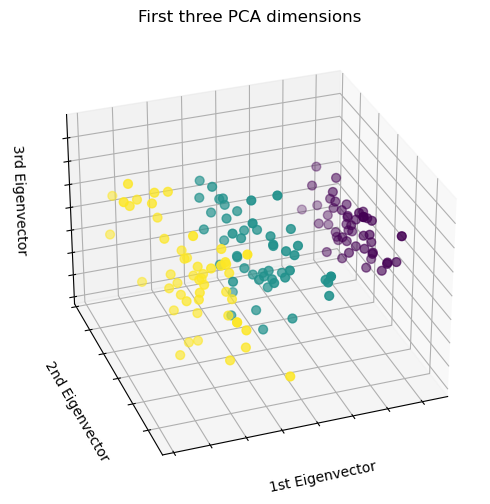

In [5]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.drop(columns=['Species','Id','target']))
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris['target'],
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

### GMM example

In [224]:
gmm = GaussianMixture(n_components=3, random_state=42)
X = iris.drop(columns=['Species','Id','target'])
gmm.fit(X)
labels = gmm.predict(X)

print("Means of Gaussian components:")
print(gmm.means_)
print("\nCovariances of Gaussian components:")
print(gmm.covariances_)

Means of Gaussian components:
[[6.54639415 2.94946365 5.48364578 1.98726565]
 [5.006      3.418      1.464      0.244     ]
 [5.9170732  2.77804839 4.20540364 1.29848217]]

Covariances of Gaussian components:
[[[0.38744093 0.09223276 0.30244302 0.06087397]
  [0.09223276 0.11040914 0.08385112 0.05574334]
  [0.30244302 0.08385112 0.32589574 0.07276776]
  [0.06087397 0.05574334 0.07276776 0.08484505]]

 [[0.121765   0.098292   0.015816   0.010336  ]
  [0.098292   0.142277   0.011448   0.011208  ]
  [0.015816   0.011448   0.029505   0.005584  ]
  [0.010336   0.011208   0.005584   0.011265  ]]

 [[0.2755171  0.09662295 0.18547072 0.05478901]
  [0.09662295 0.09255152 0.09103431 0.04299899]
  [0.18547072 0.09103431 0.20235849 0.06171383]
  [0.05478901 0.04299899 0.06171383 0.03233775]]]


### EM (Expectation Maximization)

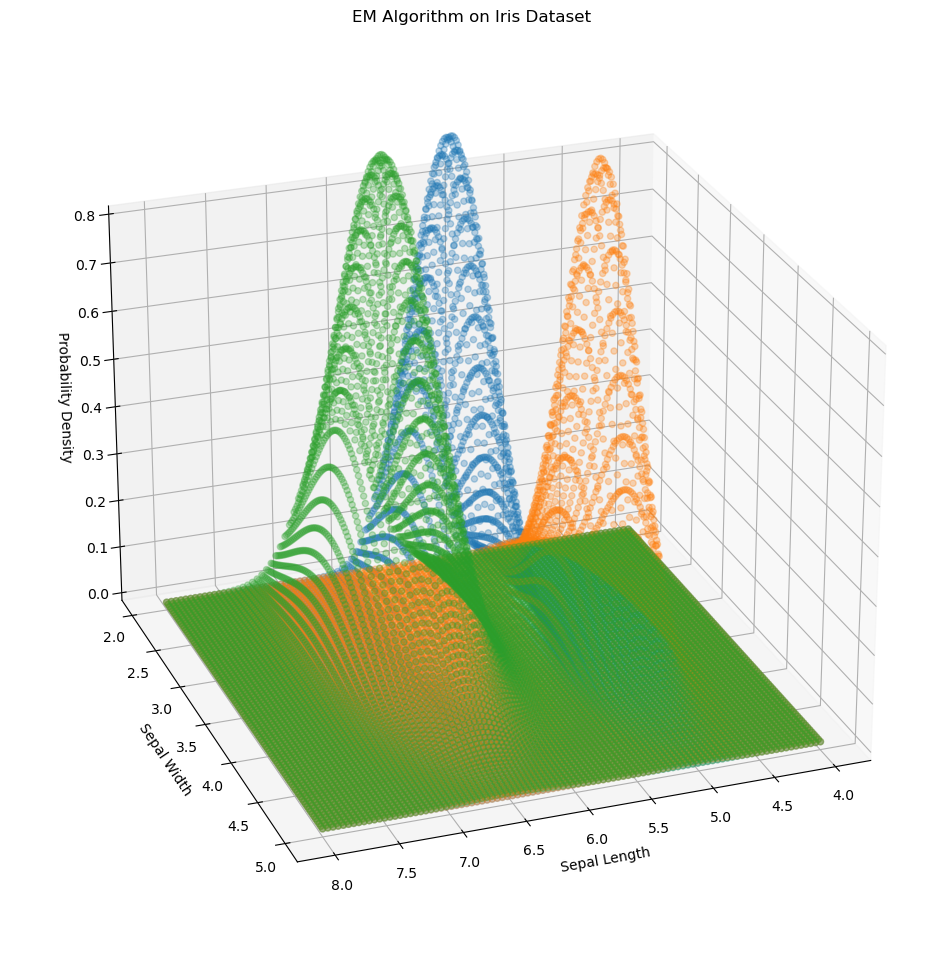

In [5]:
# Apply the EM algorithm
n_components = 3  # Number of components (number of Gaussians)
em = GaussianMixture(n_components=n_components)
X = iris.drop(columns=['Species','Id','target'])
em.fit(X)
labels = em.predict(X)
probs = em.predict_proba(X)


# Generate points for meshgrid
x = np.linspace(4, 8, 100)
y = np.linspace(2, 5, 100)
X, Y = np.meshgrid(x, y)

# Create a 3D plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the Gaussian components
for i in range(n_components):
    mean = em.means_[i][:2]  # Mean of the Gaussian
    cov = em.covariances_[i][:2, :2]  # Covariance matrix of the Gaussian

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eig_vals, eig_vecs = np.linalg.eigh(cov)

    # Compute rotation angle
    theta = np.arctan2(eig_vecs[1, 0], eig_vecs[0, 0])

    # Compute width and height of ellipse
    width, height = 2 * np.sqrt(5 * eig_vals)

    # Plot the ellipse
    ax.scatter(X, Y, gaussian_2d(X, Y, *mean, *np.sqrt(eig_vals)), alpha=0.3)

ax.view_init(elev=25, azim=70)

# Set transparent floor
ax.set_zlim(0, 0.8)
ax.plot_surface(X, Y, np.zeros_like(X), alpha=0) 
ax.plot_surface(X, Y, np.zeros_like(Y), alpha=0) 

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Probability Density')
ax.set_title('EM Algorithm on Iris Dataset')

plt.show()


### Deep NN

In [259]:
X = iris.drop(columns=['Species','Id','target'])
y = iris['target']

In [264]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [265]:
model = keras.Sequential(
    [
        keras.layers.Dense(240,activation="relu", input_shape=(x_train.shape[-1],) ),
        keras.layers.Dense(120, activation="relu"),
        keras.layers.Dense(3, activation="sigmoid"),
    ]
)

optimiz = keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optimiz ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\motil\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [266]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 240)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 120)                 │          28,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 3)                   │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,483 (119.07 KB)

 Trainable params: 30,483 (119.07 KB)

 Non-trainable params: 0 (0.00 B)

In [267]:
loss_values = []
acc_values = []
for epoch in range(200):
    history = model.fit(x_train, y_train, epochs=1,validation_data=(x_test, y_test),verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    loss_values.append(test_loss)
    acc_values.append(test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3333 - loss: 1.0116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7333 - loss: 0.9527
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8333 - loss: 0.9097
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8000 - loss: 0.8708
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7667 - loss: 0.8402
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7667 - loss: 0.8114
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8000 - loss: 0.7828
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8000 - loss: 0.7558
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8000 - loss: 0.7303
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8333 - loss: 0.7060
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8000 - loss: 0.6828
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8000 - loss: 0.6611
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8000 - loss: 0.6408
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9333 - loss:

In [268]:
loss, accuracy = model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.0991


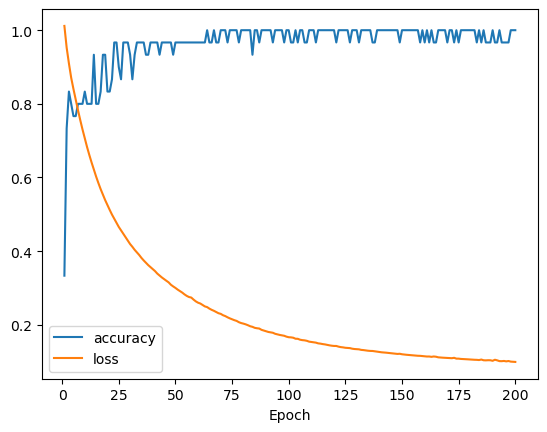

In [269]:
lenx = [i+1 for i in range(len(acc_values))]
plt.plot(lenx, acc_values, label = "accuracy")
plt.plot(lenx, loss_values, label = "loss")
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


<AxesSubplot:>

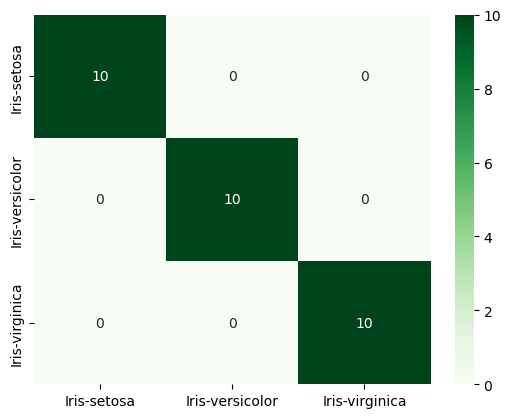

In [270]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
dfres = pd.DataFrame(data = confusion_matrix(y_test, predictions),
  columns = ['Iris-setosa','Iris-versicolor','Iris-virginica'],
  index = ['Iris-setosa','Iris-versicolor','Iris-virginica'])
sns.heatmap(dfres, cmap="Greens", annot=True, fmt='.0f')

In [271]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Baysian NN

In [166]:
X = iris.drop(columns=['Species','Id','target'])
Y = iris['target']

In [167]:
x,y = torch.tensor(X.values).float() , torch.tensor(Y.values).long()
x.shape, y.shape

(torch.Size([150, 4]), torch.Size([150]))

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)

In [189]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=4, out_features=240),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=240, out_features=120),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=120, out_features=3),
)

In [190]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=True)
kl_weight = 0.8
optimizer = optim.Adam(model.parameters(), lr=0.02)

In [191]:
kl_values = []
ce_values = []
for step in range(300):
    pre = model(x_train)
    ce = ce_loss(pre, y_train)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    kl_values.append(kl.item())
    ce_values.append(ce.item())
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
_, predicted = torch.max(pre.data, 1)
total = y_train.size(0)
correct = (predicted == y_train).sum()
print('-Train Accuracy: %f %%' % (100 * float(correct) / total))
print('-Train CE : %2.2f, Train KL : %2.2f' % (ce.item(), kl.item()))

-Train Accuracy: 97.500000 %
-Train CE : 0.10, Train KL : 0.00


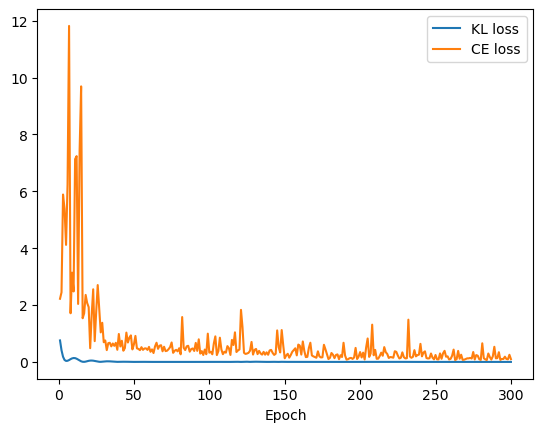

In [192]:
lenx = [i+1 for i in range(len(kl_values))]
plt.plot(lenx, kl_values, label = "KL loss")
plt.plot(lenx, ce_values, label = "CE loss")
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [193]:
def draw_plot(xx,predicted,true) :
    fig = plt.figure(figsize = (16, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(xx[:, 0], xx[:, 1], c = true)
    z2_plot = ax2.scatter(xx[:, 0], xx[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("REAL")
    ax2.set_title("PREDICT")

    plt.show()

In [194]:
pre = model(x_test)
_, predicted = torch.max(pre.data, 1)
total = y_test.size(0)
correct = (predicted == y_test).sum()
print('-Test Accuracy: %f %%' % (100 * float(correct) / total))

-Test Accuracy: 90.000000 %


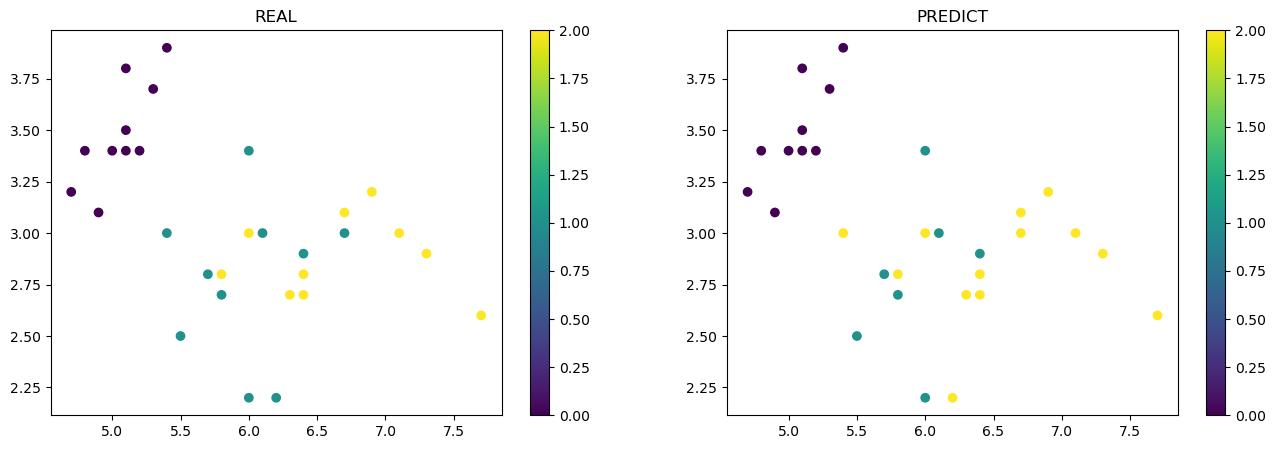

In [195]:
draw_plot(x_test,predicted,y_test)

<AxesSubplot:>

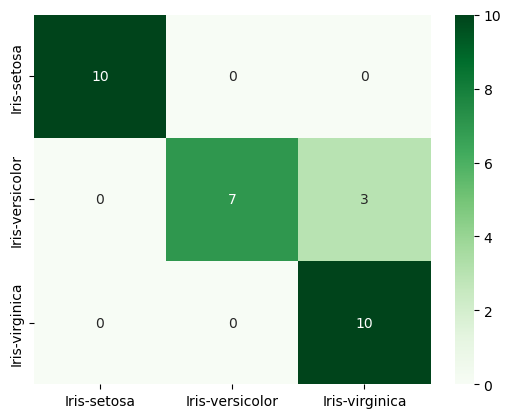

In [196]:
dfres = pd.DataFrame(data = confusion_matrix(y_test,predicted),
  columns = ['Iris-setosa','Iris-versicolor', 'Iris-virginica'],
  index = ['Iris-setosa','Iris-versicolor', 'Iris-virginica'])
sns.heatmap(dfres, cmap="Greens", annot=True, fmt='.0f')

In [197]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.70      0.82        10
           2       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



# Speakers small

In [5]:
df_small=df.query('speaker_num<=2 and MFCC==3')[['feat1','feat2','feat3','feat4','feat5','speaker_num','speaker']]
df_small

,feat1,feat2,feat3,feat4,feat5,speaker_num,speaker
774,-2.4001,-1.8847,0.952080,-1.315000,0.158540,0,FALK0
775,-1.1187,-1.9922,0.760680,-1.534300,-0.076821,0,FALK0
776,-1.6240,-1.7755,0.817240,-1.660500,-1.367500,0,FALK0
777,-2.6244,-2.7707,0.510260,-1.589900,-0.542210,0,FALK0
778,-1.7334,-1.8302,0.123170,-1.522100,-0.948420,0,FALK0
...,...,...,...,...,...,...,...
6269,-1.5178,1.8448,-0.353850,0.077294,0.675300,2,FBCH0
6270,-1.8685,1.4581,0.759220,0.831060,0.741740,2,FBCH0
6271,-2.1080,1.4605,-0.002729,-0.054682,0.319040,2,FBCH0
6272,-2.4620,1.3057,0.152250,0.350970,0.250530,2,FBCH0


### PCA

[Text(-6.0, 0, ''),
 Text(-4.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, '')]

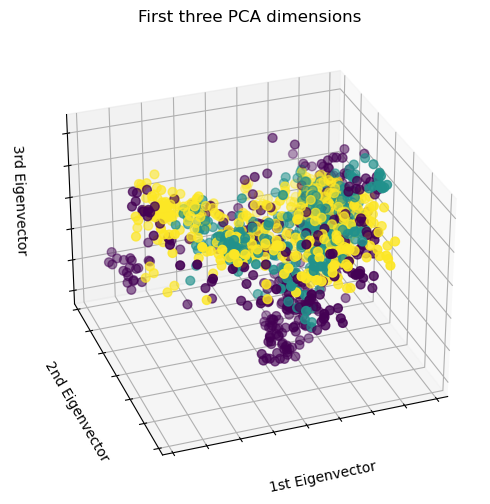

In [199]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(df_small.drop(columns=['speaker_num','speaker']))
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=df_small['speaker_num'],
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

### EM

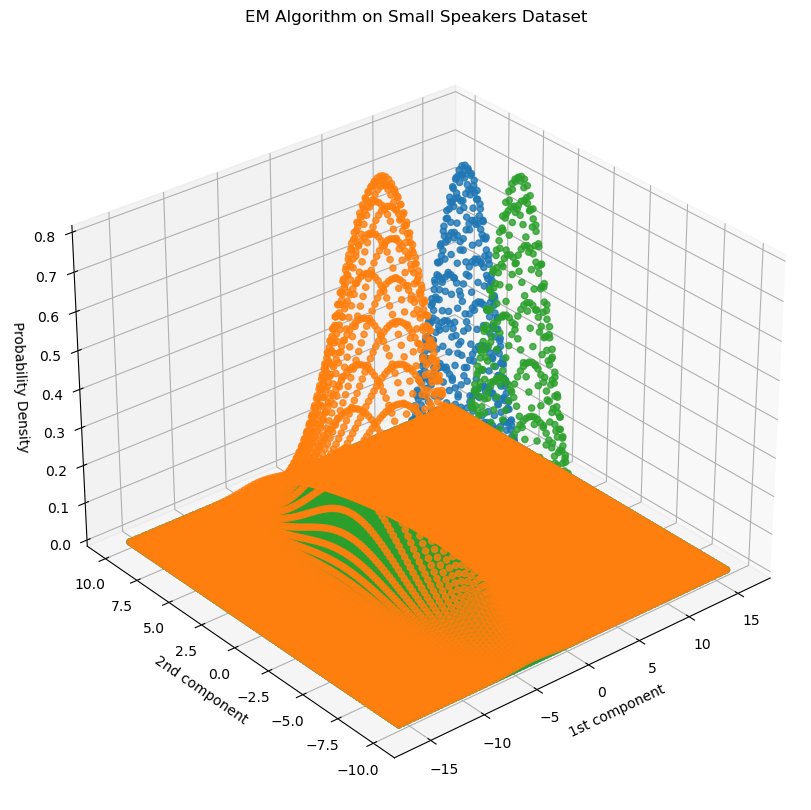

In [6]:
# Apply the EM algorithm
n_components = 3  
em = GaussianMixture(n_components=n_components)
X = df_small.drop(columns=['speaker','speaker_num'])
em.fit(X)
labels = em.predict(X)
probs = em.predict_proba(X)


# Generate points for meshgrid
x = np.linspace(-16, 16, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the Gaussian components
for i in range(n_components):
    mean = em.means_[i][:2]  # Mean of the Gaussian
    cov = em.covariances_[i][:2, :2]  # Covariance matrix of the Gaussian

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eig_vals, eig_vecs = np.linalg.eigh(cov)

    # Compute rotation angle
    theta = np.arctan2(eig_vecs[1, 0], eig_vecs[0, 0])

    # Compute width and height of ellipse
    width, height = 2 * np.sqrt(4.5 * eig_vals)

    # Plot the ellipse
    ax.scatter(X, Y, gaussian_2d(X, Y, *mean, *np.sqrt(eig_vals)), alpha=0.8)

ax.view_init(elev=30, azim=230)

ax.set_zlim(0,0.8)
ax.plot_surface(X, Y, np.zeros_like(X), alpha=0) 
ax.plot_surface(X, Y, np.zeros_like(Y), alpha=0) 

ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('Probability Density')
ax.set_title('EM Algorithm on Small Speakers Dataset')

plt.show()

### Deep NN

In [201]:
X = df_small.drop(columns=['speaker','speaker_num'])
y = df_small['speaker_num']

In [202]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [210]:
model = keras.Sequential(
    [
        keras.layers.Dense(240,activation="relu", input_shape=(x_train.shape[-1],) ),
        keras.layers.Dense(120, activation="relu"),
        keras.layers.Dense(3, activation="sigmoid"),
    ]
)
optimiz = keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optimiz ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\motil\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [211]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 240)                 │           1,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 120)                 │          28,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 3)                   │             363 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,723 (120.01 KB)

 Trainable params: 30,723 (120.01 KB)

 Non-trainable params: 0 (0.00 B)

In [212]:
loss_values = []
acc_values = []
for epoch in range(200):
    model.fit(x_train, y_train, epochs=1,validation_data=(x_test, y_test),verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    loss_values.append(test_loss)
    acc_values.append(test_accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.9835 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5559 - loss: 0.9255 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5617 - loss: 0.8974 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5711 - loss: 0.8733 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5939 - loss: 0.8500 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6093 - loss: 0.8375 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6068 - loss: 0.8359 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6118 - loss: 0.8131 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6029 - loss: 0.8193 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6137 - loss: 0.8093 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6015 - loss: 0.7998 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6152 - loss: 0.7866 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6200 - loss: 0.7845 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6124 - loss: 

In [217]:
loss, accuracy = model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7485 - loss: 0.7260 


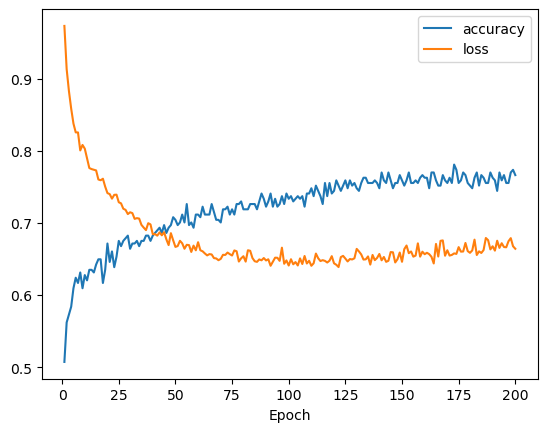

In [218]:
lenx = [i+1 for i in range(len(acc_values))]
plt.plot(lenx, acc_values, label = "accuracy")
plt.plot(lenx, loss_values, label = "loss")
plt.xlabel('Epoch')
plt.legend()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<AxesSubplot:>

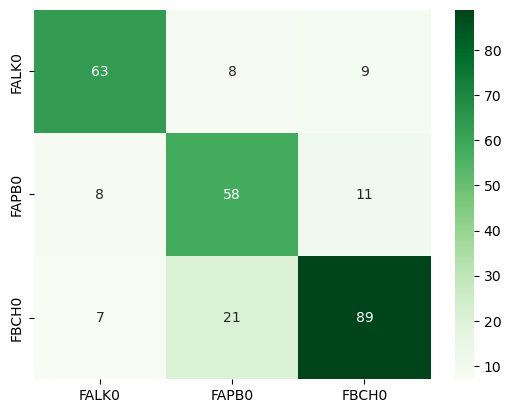

In [219]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
dfres = pd.DataFrame(data = confusion_matrix(y_test, predictions),
  columns = ['FALK0','FAPB0','FBCH0'],
  index = ['FALK0','FAPB0','FBCH0'])
sns.heatmap(dfres, cmap="Greens", annot=True, fmt='.0f')

In [220]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        80
           1       0.67      0.75      0.71        77
           2       0.82      0.76      0.79       117

    accuracy                           0.77       274
   macro avg       0.76      0.77      0.76       274
weighted avg       0.77      0.77      0.77       274



### Baysian NN

In [221]:
X = df_small.drop(columns=['speaker','speaker_num'])
Y = df_small['speaker_num']

In [222]:
x,y = torch.tensor(X.values).float() , torch.tensor(Y.values).long()
x.shape, y.shape

(torch.Size([1369, 5]), torch.Size([1369]))

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)

In [229]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=5, out_features=240),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=240, out_features=120),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=120, out_features=3),
)

In [230]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=True)
kl_weight = 0.8
optimizer = optim.Adam(model.parameters(), lr=0.02)

In [231]:
kl_values = []
ce_values = []
for step in range(300):
    pre = model(x_train)
    ce = ce_loss(pre, y_train)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    kl_values.append(kl.item())
    ce_values.append(ce.item())
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
_, predicted = torch.max(pre.data, 1)
total = y_train.size(0)
correct = (predicted == y_train).sum()
print('-Train Accuracy: %f %%' % (100 * float(correct) / total))
print('-Train CE : %2.2f, Train KL : %2.2f' % (ce.item(), kl.item()))

-Train Accuracy: 76.073059 %
-Train CE : 0.53, Train KL : 0.00


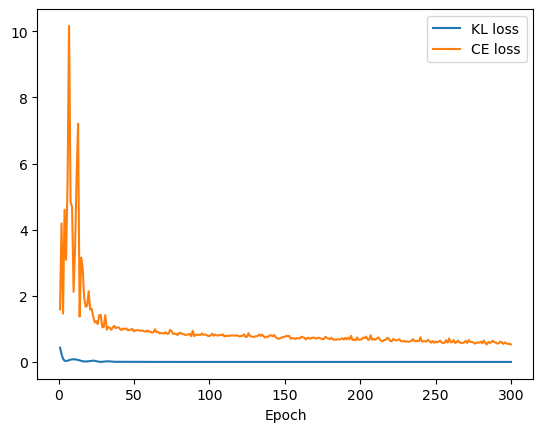

In [232]:
lenx = [i+1 for i in range(len(kl_values))]
plt.plot(lenx, kl_values, label = "KL loss")
plt.plot(lenx, ce_values, label = "CE loss")
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [233]:
pre = model(x_test)
_, predicted = torch.max(pre.data, 1)
total = y_test.size(0)
correct = (predicted == y_test).sum()
print('-Test Accuracy: %f %%' % (100 * float(correct) / total))

-Test Accuracy: 64.963504 %


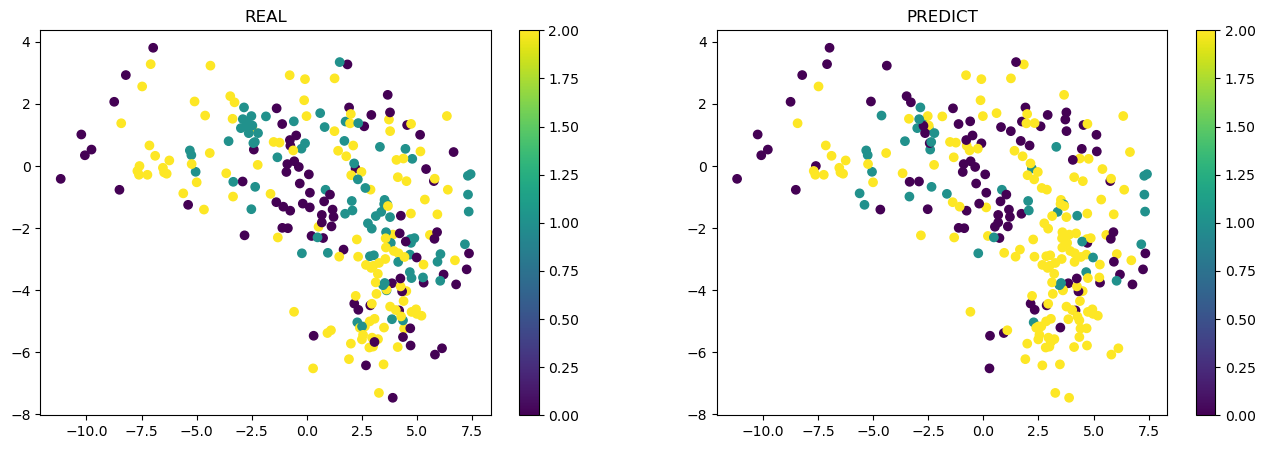

In [234]:
draw_plot(x_test,predicted,y_test)

<AxesSubplot:>

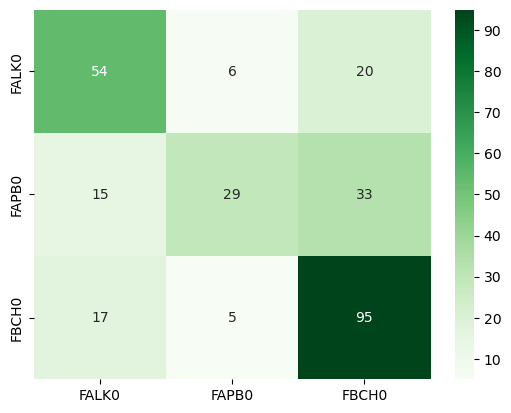

In [235]:
dfres = pd.DataFrame(data = confusion_matrix(y_test,predicted),
  columns = ['FALK0','FAPB0', 'FBCH0'],
  index = ['FALK0','FAPB0', 'FBCH0'])
sns.heatmap(dfres, cmap="Greens", annot=True, fmt='.0f')

In [236]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65        80
           1       0.72      0.38      0.50        77
           2       0.64      0.81      0.72       117

    accuracy                           0.65       274
   macro avg       0.66      0.62      0.62       274
weighted avg       0.66      0.65      0.64       274



# Speakers full

### PCA

[Text(-8.0, 0, ''),
 Text(-6.0, 0, ''),
 Text(-4.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(0.0, 0, ''),
 Text(2.0, 0, ''),
 Text(4.0, 0, ''),
 Text(6.0, 0, ''),
 Text(8.0, 0, ''),
 Text(10.0, 0, '')]

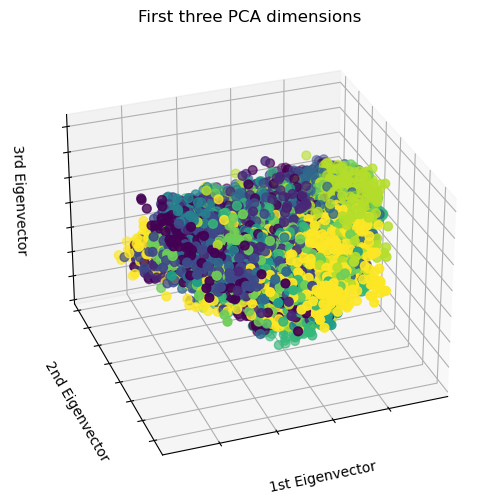

In [237]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=10).fit_transform(df.drop(columns=['speaker_num','speaker','MFCC']))
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=df['speaker_num'],
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

### EM

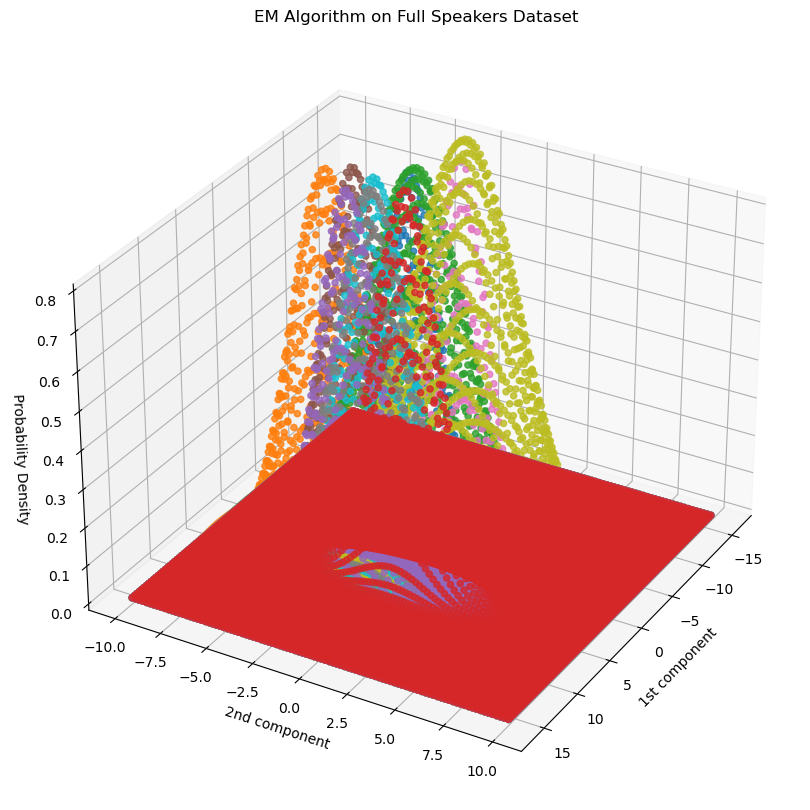

In [7]:
# Apply the EM algorithm
n_components = 10  # Number of components (number of Gaussians)
em = GaussianMixture(n_components=n_components)
X = df.drop(columns=['speaker','speaker_num','MFCC'])
em.fit(X)
labels = em.predict(X)
probs = em.predict_proba(X)

# Generate points for meshgrid
x = np.linspace(-16, 16, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the Gaussian components
for i in range(n_components):
    mean = em.means_[i][:2]  # Mean of the Gaussian
    cov = em.covariances_[i][:2, :2]  # Covariance matrix of the Gaussian

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eig_vals, eig_vecs = np.linalg.eigh(cov)

    # Compute rotation angle
    theta = np.arctan2(eig_vecs[1, 0], eig_vecs[0, 0])

    # Compute width and height of ellipse
    width, height = 2 * np.sqrt(4.5 * eig_vals)

    # Plot the ellipse
    ax.scatter(X, Y, gaussian_2d(X, Y, *mean, *np.sqrt(eig_vals)), alpha=0.8)

ax.view_init(elev=30, azim=30)

ax.set_zlim(0,0.8)
ax.plot_surface(X, Y, np.zeros_like(X), alpha=0) 
ax.plot_surface(X, Y, np.zeros_like(Y), alpha=0) 

ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('Probability Density')
ax.set_title('EM Algorithm on Full Speakers Dataset')

plt.show()

### Deep NN

In [239]:
X = df.drop(columns=['speaker','speaker_num'])
y = df['speaker_num']

In [240]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [241]:
model = keras.Sequential(
    [
        keras.layers.Dense(240,activation="relu", input_shape=(x_train.shape[-1],) ),
        keras.layers.Dense(120, activation="relu"),
        keras.layers.Dense(10, activation="sigmoid"),
    ]
)
optimiz = keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optimiz ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\motil\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [242]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 240)                 │           5,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 120)                 │          28,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │           1,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,410 (138.32 KB)

 Trainable params: 35,410 (138.32 KB)

 Non-trainable params: 0 (0.00 B)

In [243]:
loss_values = []
acc_values = []
for epoch in range(200):
    model.fit(x_train, y_train, epochs=1,validation_data=(x_test, y_test),verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    loss_values.append(test_loss)
    acc_values.append(test_accuracy)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4881 - loss: 1.4805
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5340 - loss: 1.3332
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5503 - loss: 1.2749
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5718 - loss: 1.2145
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5896 - loss: 1.1803
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5899 - loss: 1.1525
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6110 - loss: 1.1286
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6073 - loss: 1.1112
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6159 - loss: 1.0933
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6247 - loss: 1.0762
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6311 - loss: 1.0589
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6423 - loss: 1.0390
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6341 - loss: 1.0346
139/139 ━━━━━━━━━━━━━━━━━

In [244]:
loss, accuracy = model.evaluate(x_test, y_test)

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7086 - loss: 1.1042
Test Loss: 1.1158289909362793
Test Accuracy: 0.7076299786567688


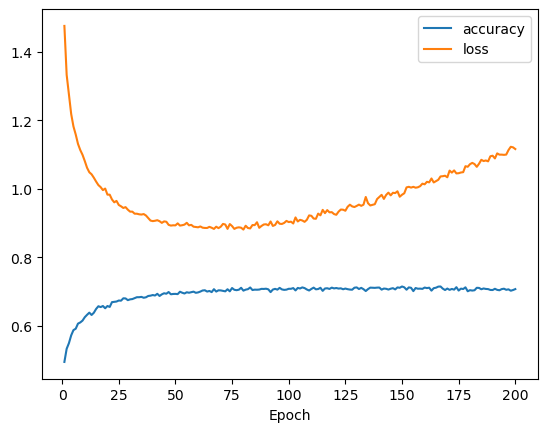

In [245]:
lenx = [i+1 for i in range(len(acc_values))]
plt.plot(lenx, acc_values, label = "accuracy")
plt.plot(lenx, loss_values, label = "loss")
plt.xlabel('Epoch')
plt.legend()
plt.show()

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<AxesSubplot:>

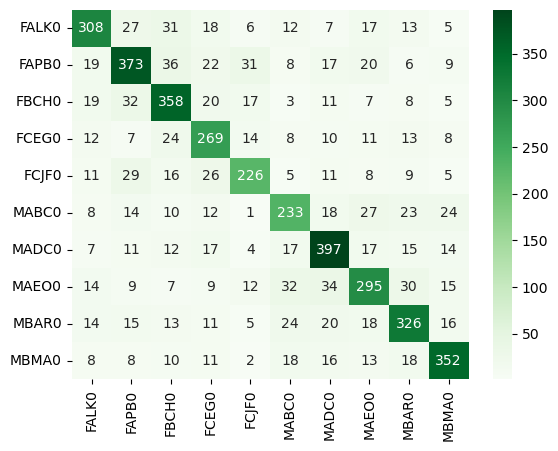

In [246]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
dfres = pd.DataFrame(data = confusion_matrix(y_test, predictions),
  columns = ['FALK0','FAPB0','FBCH0','FCEG0','FCJF0','MABC0','MADC0','MAEO0','MBAR0','MBMA0'],
  index = ['FALK0','FAPB0','FBCH0','FCEG0','FCJF0','MABC0','MADC0','MAEO0','MBAR0','MBMA0'])
sns.heatmap(dfres, cmap="Greens", annot=True, fmt='.0f')

In [247]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       444
           1       0.71      0.69      0.70       541
           2       0.69      0.75      0.72       480
           3       0.65      0.72      0.68       376
           4       0.71      0.65      0.68       346
           5       0.65      0.63      0.64       370
           6       0.73      0.78      0.75       511
           7       0.68      0.65      0.66       457
           8       0.71      0.71      0.71       462
           9       0.78      0.77      0.77       456

    accuracy                           0.71      4443
   macro avg       0.70      0.70      0.70      4443
weighted avg       0.71      0.71      0.71      4443



### Baysian NN

In [248]:
X = df.drop(columns=['speaker','speaker_num'])
Y = df['speaker_num']

In [249]:
x,y = torch.tensor(X.values).float() , torch.tensor(Y.values).long()
x.shape, y.shape

(torch.Size([22212, 21]), torch.Size([22212]))

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)

In [251]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=21, out_features=240),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=240, out_features=120),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=120, out_features=10),
)

In [252]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=True)
kl_weight = 0.8
optimizer = optim.Adam(model.parameters(), lr=0.02)

In [253]:
kl_values = []
ce_values = []
for step in range(300):
    pre = model(x_train)
    ce = ce_loss(pre, y_train)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    kl_values.append(kl.item())
    ce_values.append(ce.item())
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
_, predicted = torch.max(pre.data, 1)
total = y_train.size(0)
correct = (predicted == y_train).sum()
print('-Train Accuracy: %f %%' % (100 * float(correct) / total))
print('-Train CE : %2.2f, Train KL : %2.2f' % (ce.item(), kl.item()))

-Train Accuracy: 59.468738 %
-Train CE : 1.12, Train KL : 0.00


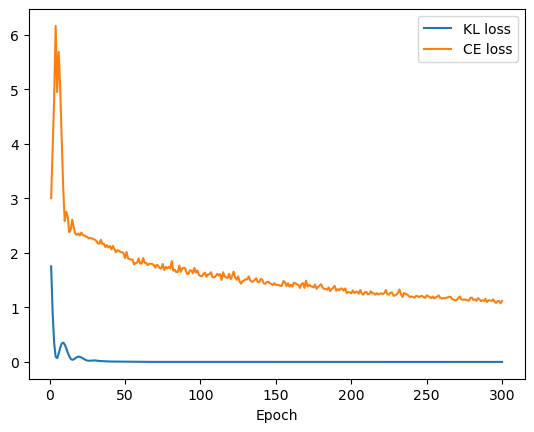

In [254]:
lenx = [i+1 for i in range(len(kl_values))]
plt.plot(lenx, kl_values, label = "KL loss")
plt.plot(lenx, ce_values, label = "CE loss")
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [255]:
pre = model(x_test)
_, predicted = torch.max(pre.data, 1)
total = y_test.size(0)
correct = (predicted == y_test).sum()
print('-Test Accuracy: %f %%' % (100 * float(correct) / total))

-Test Accuracy: 57.933828 %


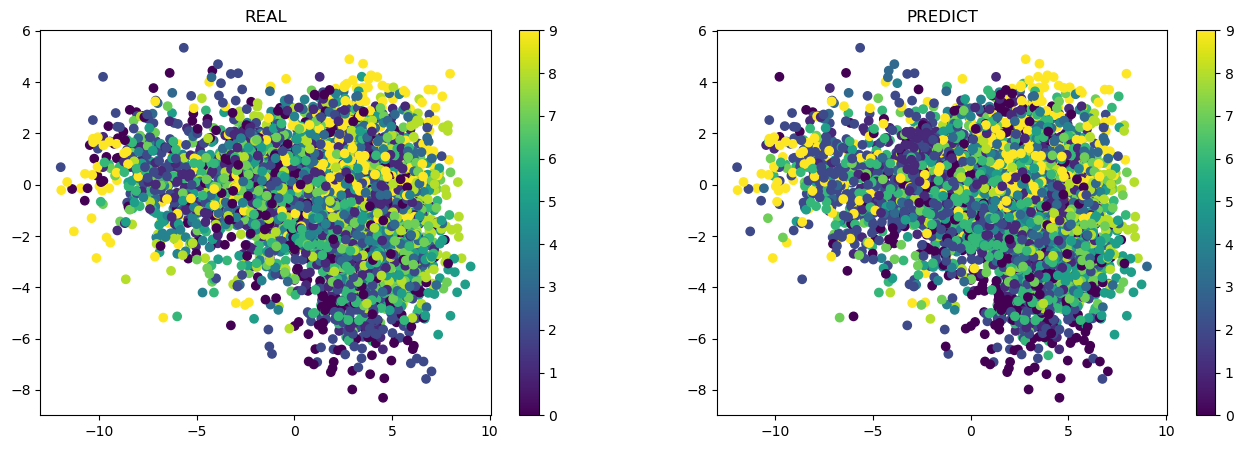

In [256]:
draw_plot(x_test,predicted,y_test)

<AxesSubplot:>

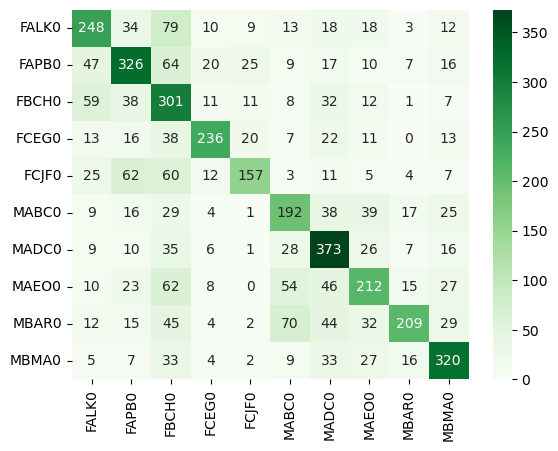

In [257]:
dfres = pd.DataFrame(data = confusion_matrix(y_test,predicted),
  columns = ['FALK0','FAPB0','FBCH0','FCEG0','FCJF0','MABC0','MADC0','MAEO0','MBAR0','MBMA0'],
  index = ['FALK0','FAPB0','FBCH0','FCEG0','FCJF0','MABC0','MADC0','MAEO0','MBAR0','MBMA0'])
sns.heatmap(dfres, cmap="Greens", annot=True, fmt='.0f')

In [258]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56       444
           1       0.60      0.60      0.60       541
           2       0.40      0.63      0.49       480
           3       0.75      0.63      0.68       376
           4       0.69      0.45      0.55       346
           5       0.49      0.52      0.50       370
           6       0.59      0.73      0.65       511
           7       0.54      0.46      0.50       457
           8       0.75      0.45      0.56       462
           9       0.68      0.70      0.69       456

    accuracy                           0.58      4443
   macro avg       0.60      0.57      0.58      4443
weighted avg       0.60      0.58      0.58      4443

